**Library**

In [48]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
data = pd.read_csv("StudentsPerformance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
x_feat = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course", "math score", "writing score"]
categ_feat = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
encoded_data = pd.get_dummies(data[x_feat], columns=categ_feat, drop_first=True, dtype=int)
encoded_data.columns

Index(['math score', 'writing score', 'gender_male', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none'],
      dtype='object')

In [27]:
x = encoded_data
y = data['reading score']
print(x)
print(y)

     math score  writing score  ...  lunch_standard  test preparation course_none
0            72             74  ...               1                             1
1            69             88  ...               1                             0
2            90             93  ...               1                             1
3            47             44  ...               0                             1
4            76             75  ...               1                             1
..          ...            ...  ...             ...                           ...
995          88             95  ...               1                             0
996          62             55  ...               0                             1
997          59             65  ...               0                             0
998          68             77  ...               1                             0
999          77             86  ...               0                             1

[1000 rows x 14

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x_train)
len(x_test)

200

In [29]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [30]:
linreg.intercept_

np.float64(2.3711631228589454)

In [31]:
linreg.coef_

array([ 0.12486736,  0.86408492,  0.12912873, -0.49130957, -0.67706995,
       -1.88896459, -0.37966465, -0.99277953,  0.89481349, -0.62983324,
       -0.20973888,  1.1492536 , -1.43347256,  1.96513542])

Text(0, 0.5, 'Fetaures')

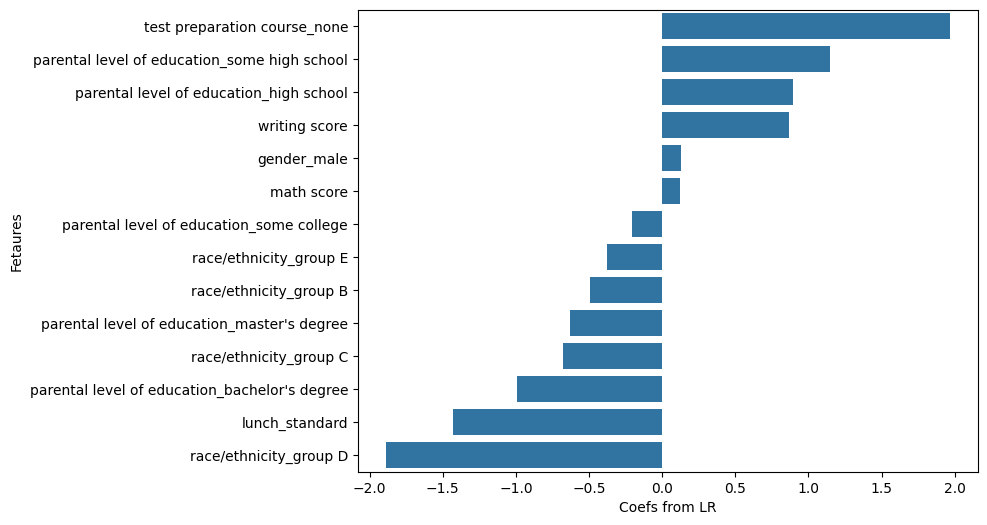

In [35]:
columns_coef = pd.DataFrame({"columns": encoded_data.columns, "coef": linreg.coef_})
sorted_coef = columns_coef.sort_values("coef", ascending=False)

plt.figure(figsize=(8, 6))
sn.barplot(x="coef", y="columns", data=sorted_coef)
plt.xlabel("Coefs from LR")
plt.ylabel("Fetaures")

In [36]:
y_pred = linreg.predict(x_test)

In [38]:
test_preds = pd.DataFrame({"actual": y_test, "predicted": y_pred, "residual": y_test - y_pred})
test_preds.sample(10)

,actual,predicted,residual
260,79,77.369396,1.630604
548,67,67.597253,-0.597253
998,78,73.864506,4.135494
810,31,41.656500,-10.656500
914,61,57.113558,3.886442
209,61,67.907161,-6.907161
670,76,71.553062,4.446938
307,52,47.892110,4.107890
989,86,80.357621,5.642379
355,72,69.521590,2.478410


In [47]:
r2_train = r2_score(y_train, linreg.predict(x_train))
print(r2_train)
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.9282319314630507
0.9179545661050624


In [42]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

18.565599730519757


In [43]:
rmse = np.sqrt(mse)
print(rmse)

4.308781699102399


In [51]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(linreg, x, y, cv=cv, scoring="r2")
print(cv_scores)
print(cv_scores.mean())

[0.91795457 0.93592646 0.92201243 0.9163049  0.92427541]
0.9232947530803628
